Ανάπτυξη Λογισμικού για Αλγοριθμικά Προβλήματα Εργασία 3

Ονοματεπώνυμο: Άγγελος Κόντος <br>
SDI: 1115202000089 <br>
Ονοματεπώνυμο: Σοφία Κυριακή Μάχαιρα <br>
SDI: 1115202000125



In [ ]:
import sys

# Default file names
inputfile = "input.dat"
queryfile = "query.dat"
encoderfilep = "encoder_pf.dat"
encoderfileq = "encoder_qf.dat"

# Check if alternative parameters were given
for i in range(len(sys.argv) - 1):
  if sys.argv[i] == "-d":
    inputfile = sys.argv[i + 1]
  if sys.argv[i] == "-q":
    queryfile = sys.argv[i + 1]
  if sys.argv[i] == "-od":
    encoderfilep = sys.argv[i + 1]
  if sys.argv[i] == "-oq":
    encoderfileq = sys.argv[i + 1]

In [ ]:
import pathlib
import numpy as np
import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from keras import layers, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

w, h = 28, 28 # weight and height
# Read file using numpy "fromfile()" and store into images
images = []
# ebala 60.000
try:
  with open(inputfile, mode = 'rb') as f:
    images = np.fromfile(f, dtype = np.uint8, count = 60000*w*h, offset = 16).reshape(60000, h*w)
  with open(queryfile, mode = 'rb') as f:
    queries = np.fromfile(f, dtype = np.uint8, count = 10*w*h, offset = 16).reshape(10, h*w)
except FileNotFoundError:
  print("Error! File not found.")

In [ ]:
# arxikopoisi
ima = np.zeros((len(images), 28, 28, 1), dtype = np.float32)
ima = images.reshape((len(images), 28, 28, 1))
que = np.zeros((len(images), 28, 28, 1), dtype = np.float32)
que = que.reshape((len(images), 28, 28, 1))

In [ ]:
points_train, points_val = train_test_split(ima[0:3000], random_state = 1000, test_size = 0.1, shuffle = True)
points_train = points_train.astype('float32') /255.0
points_val = points_val.astype('float32') /255.0

# autoencoder.fit(x_train, x_train,epochs=10,shuffle=True,validation_data=(x_test, x_test))
class Autoencoder(Model):
    def __init__(self, latent_dim, filter1, filter2, kernel_size1, kernel_size2, pool1, pool2):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder_conv1 = layers.Conv2D(filters = filter1, kernel_size = kernel_size1, strides = (2, 2), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)) # 28 x 28 x 32
        self.encoder_maxpool1 = layers.MaxPooling2D(pool_size = pool1, padding = 'same')
        self.encoder_conv2 = layers.Conv2D(filters = filter2, kernel_size = kernel_size2, strides = (2, 2), padding = 'same', activation = 'relu') # 14 x 14 x 64
        self.encoder_maxpool2 = layers.MaxPooling2D(pool_size = pool2, padding = 'same')
        self.encoder_flatten = layers.Flatten() # flattens it to 1 dimension so we can use Dense
        self.encoder_dense = layers.Dense(latent_dim) # to make it latent_dim numbers 1 dimension

        # Decoder layers
        self.decoder_dense = layers.Dense(units = 7*7*filter1, activation = 'relu')
        self.decoder_reshape = layers.Reshape(target_shape = (7, 7, filter1))
        self.decoder_upsample1 = layers.UpSampling2D(size = pool1)
        self.decoder_conv1 = layers.Conv2D(filters = filter2, kernel_size = kernel_size2, padding = 'same', activation = 'relu')
        self.decoder_upsample2 = layers.UpSampling2D(size = pool2)
        self.decoder_conv2 = layers.Conv2D(filters = filter2, kernel_size = kernel_size1, padding = 'same', activation = 'relu')
        self.decoder_conv3 = layers.Conv2D(filters = 1, kernel_size = 3, padding = 'same', activation = 'sigmoid') # 28 x 28 x1

    def encode(self, x):
        x = self.encoder_conv1(x)
        x = self.encoder_maxpool1(x)
        x = self.encoder_conv2(x)
        x = self.encoder_maxpool2(x)
        x = self.encoder_flatten(x)
        x = self.encoder_dense(x)
        return x

    def decode(self, x):
        x = self.decoder_dense(x)
        x = self.decoder_reshape(x)
        x = self.decoder_upsample1(x)
        x = self.decoder_conv1(x)
        x = self.decoder_upsample2(x)
        x = self.decoder_conv2(x)
        x = self.decoder_conv3(x)
        return x
    def call(self, inputs):
        # Encoder
        x = self.encoder_conv1(inputs)
        x = self.encoder_maxpool1(x)
        x = self.encoder_conv2(x)
        x = self.encoder_maxpool2(x)
        x = self.encoder_flatten(x)
        encoded = self.encoder_dense(x)

        # Decoder
        x = self.decoder_dense(encoded)
        x = self.decoder_reshape(x)
        x = self.decoder_upsample1(x)
        x = self.decoder_conv1(x)
        x = self.decoder_upsample2(x)
        x = self.decoder_conv2(x)
        decoded = self.decoder_conv3(x)

        return decoded
# epoch7 batch5 latent_dim20 filter1 128 filter2 32 kernel_size1 4 kernel_size2 5
latent_dim = 20
autoencoder = Autoencoder(latent_dim,128,32,4,5,(2,2),(2,2))
# Compile the model
autoencoder.compile(optimizer = 'adam', loss = 'mse')
all_points = ima.astype('float32') / 255.0
all_q = que.astype('float32') / 255.0
# Train the autoencoder                                                                                      points_val, points_val
autoencoder.fit(points_train, points_train, epochs = 7, batch_size = 5, shuffle = True, validation_data = (points_val, points_val)) # As mentioned in class, ideal epochs and batches size = 10


Epoch 1/7
540/540 [==============================] - 12s 8ms/step - loss: 0.1130 - val_loss: 0.1135
Epoch 2/7
540/540 [==============================] - 4s 8ms/step - loss: 0.0549 - val_loss: 0.0258
Epoch 3/7
540/540 [==============================] - 4s 8ms/step - loss: 0.0199 - val_loss: 0.0174
Epoch 4/7
540/540 [==============================] - 5s 10ms/step - loss: 0.0148 - val_loss: 0.0152
Epoch 5/7
540/540 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0138
Epoch 6/7
540/540 [==============================] - 2s 4ms/step - loss: 0.0109 - val_loss: 0.0136
Epoch 7/7
540/540 [==============================] - 2s 4ms/step - loss: 0.0100 - val_loss: 0.0127


In [ ]:
encoded_images = autoencoder.encode(all_points[0:20000])
encoded_q =autoencoder.encode(all_q[0:10])
decoded_q =autoencoder.decode(encoded_q)
decoded_q = decoded_q*255
decoded_q = tf.cast(decoded_q, dtype=tf.int32)
decoded_images = autoencoder.predict(all_points[0:20000])
decoded_images = decoded_images*255
decoded_images = tf.cast(decoded_images, dtype = tf.int32)
with open(encoderfilep, 'w') as file:
  file.write(str(50000)) # Magic number
  file.write(' ')
  file.write(str(len(encoded_images)))
  file.write(' ')
  file.write(str(latent_dim))
  file.write(' ')
  file.write(str(1))
  file.write(' ')
  file.write('\n')
  for i, encoded_image in enumerate(encoded_images):
      file.write(' '.join(map(str, encoded_image.numpy().flatten())))
      file.write('\n')
  file.close()
with open(f'decoder_pf.dat', 'w') as file:
    file.write(str(50000)) # Magic number
    file.write(' ')
    file.write(str(len(decoded_images)))
    file.write(' ')
    file.write("28")
    file.write(' ')
    file.write("28")
    file.write(' ')
    file.write('\n')
    for i, decoded_image in enumerate(decoded_images):
        file.write(' '.join(map(str, decoded_image.numpy().flatten())))
        file.write('\n')
    file.close()
with open(f'decoder_qf.dat', 'w') as file:
    for i, decoded_image in enumerate(decoded_q):
      file.write(' '.join(map(str, decoded_q.numpy().flatten())))
      file.write('\n')
    file.close()
with open(encoderfileq, 'w') as file:
    for i, encoded_image in enumerate(encoded_q):
      file.write(' '.join(map(str, encoded_image.numpy().flatten())))
      file.write('\n')
    file.close()

625/625 [==============================] - 2s 2ms/step


In [ ]:
import subprocess
# ADD EXTRA PARAMETERS FOR ALGORITHMS HERE IF NECESSARY
command = ["./reduced", "-d", inputfile, "-q", queryfile, "-o", "output.txt", "-od", encoderfilep, "-oq", encoderfileq, "-dp", "decoder_pf.dat", "-dq", "decoder_qf.dat"]

subprocess.run(command)

In [ ]:
# gia na doyme apla poso kala ftiaxnontai
points_test = ima[30000:].astype('float32') / 255.0
decoded_images = autoencoder.predict(points_test)
encoded_images = autoencoder.encode(points_test)

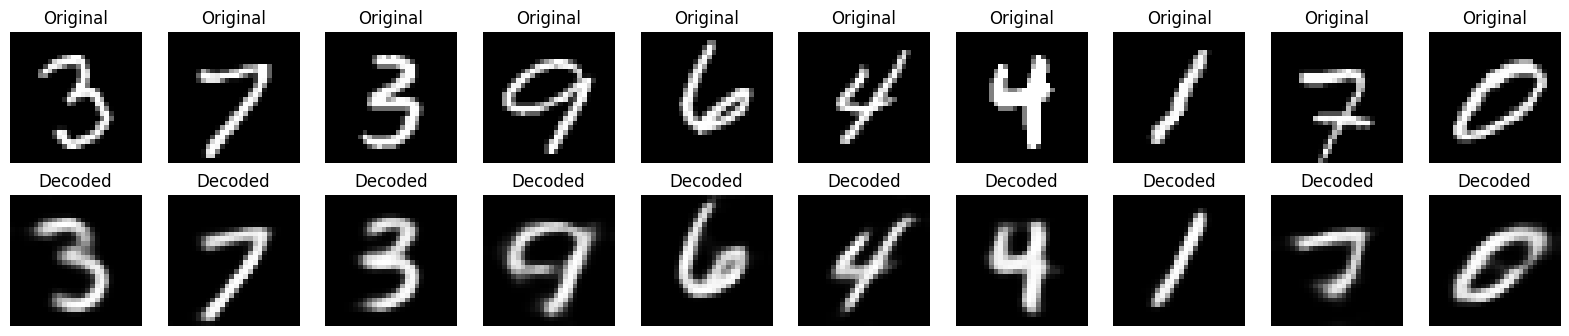

In [ ]:

n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(points_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("Original")
    plt.axis("off")

    # Decoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap = 'gray')
    plt.title("Decoded")
    plt.axis("off")

plt.show()

In [ ]:
# pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [ ]:
# import optuna
# import torch.optim as optim
# from optuna.trial import TrialState
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split

# class Autoencoder(Model):
#     def __init__(self, latent_dim, filter1, filter2, kernel_size1, kernel_size2, pool1, pool2):
#         super(Autoencoder, self).__init__()
#         self.latent_dim = latent_dim

#         self.encoder_conv1 = layers.Conv2D(filters = filter1, kernel_size = kernel_size1, strides = (2, 2), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)) # 28 x 28 x 32
#         self.encoder_maxpool1 = layers.MaxPooling2D(pool_size = pool1, padding = 'same')
#         self.encoder_conv2 = layers.Conv2D(filters = filter2, kernel_size = kernel_size2, strides = (2, 2), padding = 'same', activation = 'relu') # 14 x 14 x 64
#         self.encoder_maxpool2 = layers.MaxPooling2D(pool_size = pool2, padding = 'same')
#         self.encoder_flatten = layers.Flatten() # flattens it to 1 dimension so we can use Dense
#         self.encoder_dense = layers.Dense(latent_dim) # to make it latent_dim numbers 1 dimension

#         # Decoder layers
#         self.decoder_dense = layers.Dense(units = 7*7*filter1, activation = 'relu')
#         self.decoder_reshape = layers.Reshape(target_shape = (7, 7, filter1))
#         self.decoder_upsample1 = layers.UpSampling2D(size = pool1)
#         self.decoder_conv1 = layers.Conv2D(filters = filter2, kernel_size = kernel_size2, padding = 'same', activation = 'relu')
#         self.decoder_upsample2 = layers.UpSampling2D(size = pool2)
#         self.decoder_conv2 = layers.Conv2D(filters = filter2, kernel_size = kernel_size1, padding = 'same', activation = 'relu')
#         self.decoder_conv3 = layers.Conv2D(filters = 1, kernel_size = 3, padding = 'same', activation = 'sigmoid') # 28 x 28 x1

#     def encode(self, x):
#         x = self.encoder_conv1(x)
#         x = self.encoder_maxpool1(x)
#         x = self.encoder_conv2(x)
#         x = self.encoder_maxpool2(x)
#         x = self.encoder_flatten(x)
#         x = self.encoder_dense(x)
#         return x

#     def decode(self, x):
#         x = self.decoder_dense(x)
#         x = self.decoder_reshape(x)
#         x = self.decoder_upsample1(x)
#         x = self.decoder_conv1(x)
#         x = self.decoder_upsample2(x)
#         x = self.decoder_conv2(x)
#         x = self.decoder_conv3(x)
#         return x
#     def call(self, inputs):
#         # Encoder
#         x = self.encoder_conv1(inputs)
#         x = self.encoder_maxpool1(x)
#         x = self.encoder_conv2(x)
#         x = self.encoder_maxpool2(x)
#         x = self.encoder_flatten(x)
#         encoded = self.encoder_dense(x)

#         # Decoder
#         x = self.decoder_dense(encoded)
#         x = self.decoder_reshape(x)
#         x = self.decoder_upsample1(x)
#         x = self.decoder_conv1(x)
#         x = self.decoder_upsample2(x)
#         x = self.decoder_conv2(x)
#         decoded = self.decoder_conv3(x)

#         return decoded

# def objective(trial):
#   # trial.suggest_categorical('parameter_name', [32, 64, 128])
#     epo = trial.suggest_int("epo", 5, 10)
#     batch = trial.suggest_int("batch", 1, 10)
#     latent_dim = trial.suggest_int("latent_dim", 1, 20)
#     filter1 = trial.suggest_categorical('filter1', [16, 32, 64, 128])
#     filter2 = trial.suggest_categorical('filter2', [16, 32, 64, 128])
#     kernel_size1 = trial.suggest_int("kernel_size1", 3, 5)
#     kernel_size2 = trial.suggest_int("kernel_size2", 3, 5)
#     # pool1 = trial.suggest_int("pool1", 2, 4)
#     # pool2 = trial.suggest_int("pool2", 2, 4)
#     p1 = (2, 2)  #ta alla eixan problima
#     p2 = (2, 2) #ta alla eixan problima
#     lr = trial.suggest_float("lr", 1e-5, 1e-2, log = True)
#     print(epo, batch, latent_dim, filter1, filter2, kernel_size1, kernel_size2, p1, p2, trial.number)
#     autoencoder = Autoencoder(latent_dim, filter1, filter2, kernel_size1, kernel_size2, p1, p2)
#     autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mse')

#     autoencoder.fit(points_train, points_train, epochs = epo, batch_size = batch, shuffle = True, validation_data = (points_val, points_val), verbose = 2)
#     encoded_images = autoencoder.encode(all_points)
#     encoded_q =autoencoder.encode(all_q[0:10])
#     decoded_q = autoencoder.decode(encoded_q)
#     decoded_q = decoded_q*255
#     decoded_q = tf.cast(decoded_q, dtype=tf.int32)
#     decoded_images = autoencoder.decode(encoded_images)
#     decoded_images = decoded_images*255
#     decoded_images = tf.cast(decoded_images, dtype = tf.int32)
#     with open(f'encoder_p_{trial.number}.dat', 'w') as file:
#       file.write(str(50000)) # Magic number
#       file.write(' ')
#       file.write(str(len(encoded_images)))
#       file.write(' ')
#       file.write(str(latent_dim))
#       file.write(' ')
#       file.write(str(1))
#       file.write(' ')
#       file.write('\n')
#       for i, encoded_image in enumerate(encoded_images):
#           file.write(' '.join(map(str, encoded_image.numpy().flatten())))
#           file.write('\n')
#       file.close()
#     with open(f'decoder_p_{trial.number}.dat', 'w') as file:
#       file.write(str(50000)) # Magic number
#       file.write(' ')
#       file.write(str(len(decoded_images)))
#       file.write(' ')
#       file.write("28")
#       file.write(' ')
#       file.write("28")
#       file.write(' ')
#       file.write('\n')
#       for i, decoded_image in enumerate(decoded_images):
#           file.write(' '.join(map(str, decoded_image.numpy().flatten())))
#           file.write('\n')
#       file.close()
#     with open(f'decoder_q_{trial.number}.dat', 'w') as file:
#       for i, decoded_image in enumerate(decoded_q):
#           file.write(' '.join(map(str, decoded_q.numpy().flatten())))
#           file.write('\n')
#       file.close()
#     with open(f'encoder_q_{trial.number}.dat', 'w') as file:
#       for i, encoded_image in enumerate(encoded_q):
#           file.write(' '.join(map(str, encoded_image.numpy().flatten())))
#           file.write('\n')
#       file.close()
#     return autoencoder.evaluate(points_val, points_val)



# all_points = ima.astype('float32') / 255.0
# all_q = que.astype('float32') / 255.0
# points_train, points_val = train_test_split(ima[0:20000], random_state = 1000, test_size = 0.1, shuffle = True)
# points_train = points_train.astype('float32') / 255.0
# points_val = points_val.astype('float32') / 255.0
# # Create a study object and optimize the objective function
# study = optuna.create_study(direction = "minimize")
# study.optimize(objective, n_trials = 10)

# # Get the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Train the final model with the best hyperparameters
# best_latent_dim = best_params["latent_dim"]
# best_filter1 = best_params["filter1"]
# best_filter2 = best_params["filter2"]
# best_kernel_size1 = best_params["kernel_size1"]
# best_kernel_size2 = best_params["kernel_size2"]
# # best_pool1 = best_params["pool1"]
# # best_pool2 = best_params["pool2"]
# best_epo = best_params["epo"]
# best_batch = best_params["batch"]
# best_lr = best_params["lr"]


[I 2023-12-24 14:26:19,959] A new study created in memory with name: no-name-40973d97-54b2-4506-950d-ca190aeace8d


10 8 16 64 128 3 4 (2, 2) (2, 2) 0
